# Arabic Handwritten Characters
## Data Exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# re-read the data
trainX = pd.read_csv('Datasets/csvTrainImages 13440x1024.csv', header=None)
trainY = pd.read_csv('Datasets/csvTrainLabel 13440x1.csv', header=None)
# reading training sets
testX = pd.read_csv('Datasets/csvTestImages 3360x1024.csv', header=None)
testY = pd.read_csv('Datasets/csvTestLabel 3360x1.csv', header=None)

## Data Preprocessing

In [3]:
# reshape features
trainX = np.array(trainX).reshape(trainX.shape[0], 32, 32 )
testX = np.array(testX).reshape(testX.shape[0], 32, 32)

In [4]:
# check shapes
print(trainX.shape)
print(testX.shape)

(13440, 32, 32)
(3360, 32, 32)


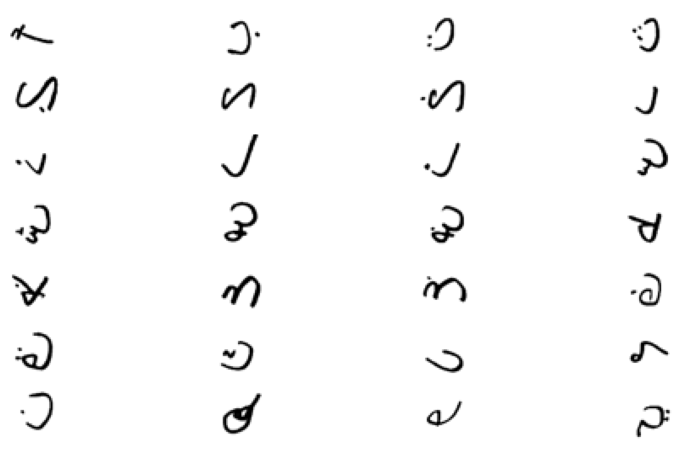

In [5]:
# show some samples
fig, ax = plt.subplots(7, 4, figsize=(14,8))

img_idx = 0
for i in range(7):
    for j in range(4):
        ax[i,j].imshow(trainX[img_idx], 'binary', )
        ax[i,j].set_axis_off()
        img_idx += 8
plt.show()
fig.savefig('Imgs/sample.png')

In [6]:
# normalize the data
trainX = trainX / trainX.max() 
testX = testX / testX.max() 

In [7]:
# encode the label
from sklearn.preprocessing import LabelEncoder

# create the encoder
encoder = LabelEncoder()
encoder.fit(trainY)
# encoding
trainY = encoder.transform(trainY)
testY = encoder.transform(testY)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Modeling 

### Basic DNN model

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
# building model
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(28, activation = 'softmax'))

# setting optimizer, loss and accuracy matrix
model.compile(optimizer= 'Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [10]:
# train the model
callback = EarlyStopping(patience= 3)
model.fit(trainX, trainY, 
          epochs= 10, batch_size = 16, 
          validation_split = 0.2, 
          verbose = 1, 
          callbacks = [callback])

Epoch 1/10
672/672 [==============================] - 4s 5ms/step - loss: 2.1324 - accuracy: 0.3304 - val_loss: 1.5480 - val_accuracy: 0.4714
Epoch 2/10
672/672 [==============================] - 3s 5ms/step - loss: 1.1504 - accuracy: 0.5943 - val_loss: 1.1386 - val_accuracy: 0.5975
Epoch 3/10
672/672 [==============================] - 3s 4ms/step - loss: 0.7765 - accuracy: 0.7150 - val_loss: 1.0943 - val_accuracy: 0.6332
Epoch 4/10
672/672 [==============================] - 3s 4ms/step - loss: 0.5735 - accuracy: 0.7945 - val_loss: 1.0733 - val_accuracy: 0.6555
Epoch 5/10
672/672 [==============================] - 3s 5ms/step - loss: 0.4291 - accuracy: 0.8415 - val_loss: 1.1008 - val_accuracy: 0.6700
Epoch 6/10
672/672 [==============================] - 3s 4ms/step - loss: 0.3315 - accuracy: 0.8790 - val_loss: 1.1642 - val_accuracy: 0.6700
Epoch 7/10
672/672 [==============================] - 3s 4ms/step - loss: 0.2556 - accuracy: 0.9078 - val_loss: 1.2264 - val_accuracy: 0.6737


In [12]:
# test the model
model.evaluate(testX, testY)

105/105 [==============================] - 0s 3ms/step - loss: 0.9312 - accuracy: 0.7437


[0.9311620593070984, 0.7437499761581421]

### Deeper CNN

In [13]:
# reshape the data for Convolutional layers
trainX = trainX.reshape([-1, 32, 32, 1])
testX = testX.reshape([-1, 32, 32, 1])


In [38]:
from keras.models import Sequential 
from keras.layers import MaxPooling2D, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
# Add a conv2D layer and MaxPool2D layer
model.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
# Add a conv2D layer and MaxPool2D layer
model.add(Conv2D(filters=128, kernel_size=7, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

# Add a conv2D layer and MaxPool2D layer
model.add(Conv2D(filters=256, kernel_size=11, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
# Add a conv2D layer and MaxPool2D layer
model.add(Conv2D(filters=256, kernel_size=11, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
# Add a flatten layer
model.add(Flatten())
# Add a Dense layer with 512 unit
model.add(Dense(256,activation='relu'))
# model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
# Add an output Layer
model.add(Dense(28,activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_56 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 8, 8, 64)        

In [39]:
callback = EarlyStopping(patience = 3)
h = model.fit(trainX, trainY, 
              epochs = 25, batch_size = 64,
              validation_split = 0.20,
              callbacks= [callback])

Epoch 1/25
168/168 [==============================] - 11s 58ms/step - loss: 3.0725 - accuracy: 0.0732 - val_loss: 2.4773 - val_accuracy: 0.1525
Epoch 2/25
168/168 [==============================] - 10s 57ms/step - loss: 1.9615 - accuracy: 0.2847 - val_loss: 1.3217 - val_accuracy: 0.4933
Epoch 3/25
168/168 [==============================] - 10s 57ms/step - loss: 1.2873 - accuracy: 0.4914 - val_loss: 0.7753 - val_accuracy: 0.6860
Epoch 4/25
168/168 [==============================] - 9s 56ms/step - loss: 0.8781 - accuracy: 0.6689 - val_loss: 0.5240 - val_accuracy: 0.8051
Epoch 5/25
168/168 [==============================] - 9s 56ms/step - loss: 0.6373 - accuracy: 0.7733 - val_loss: 0.4028 - val_accuracy: 0.8690
Epoch 6/25
168/168 [==============================] - 10s 57ms/step - loss: 0.4970 - accuracy: 0.8310 - val_loss: 0.3301 - val_accuracy: 0.8977
Epoch 7/25
168/168 [==============================] - 9s 56ms/step - loss: 0.4181 - accuracy: 0.8638 - val_loss: 0.2694 - val_accuracy: 0.

In [40]:
model.evaluate(testX, testY)

105/105 [==============================] - 2s 16ms/step - loss: 0.1372 - accuracy: 0.9637


[0.13721053302288055, 0.963690459728241]

In [41]:
model.save('Models/model_964acc.h5')

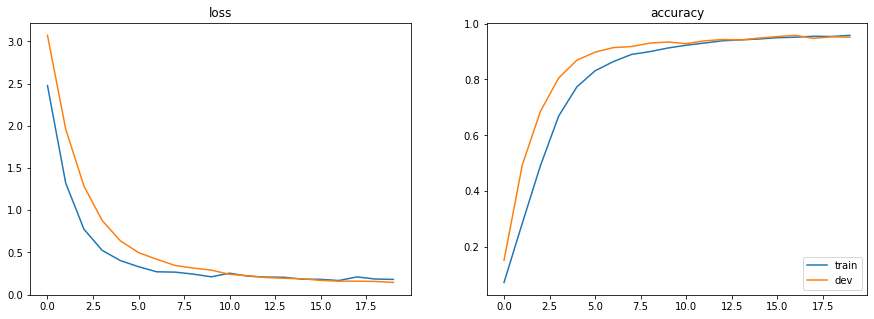

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5) )
ax1.plot(h.history['val_loss'])
ax1.plot(h.history['loss'])
ax1.set_title('loss')
ax2.plot(h.history['accuracy'])
ax2.plot(h.history['val_accuracy'])
ax2.set_title('accuracy')


plt.legend(['train', 'dev'], loc='lower right')
plt.show()